# Generate training batches for VQ-VAE

In [ ]:
import os
import sys
import time
import h5py
import numpy as np
from datetime import datetime, timedelta

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du

## Main script

In [5]:
year = 2023
BATCH_dir = '/glade/campaign/cisl/aiml/ksha/BATCH_MRMS/'

N_hour = 3
size = 128 # patch size: 128-by-128
gap = 24 # subset patches with gaps of 24 grids
N_rain_thres = 800 # each patch must have 1600 raining grid cells
V_rain_thres = 0.1 # 0.1 mm/3h means rain

In [7]:
with h5py.File(save_dir+'CNN_domain.hdf', 'r') as h5io:
    lon_01 = h5io['lon_01'][...]
    lat_01 = h5io['lat_01'][...]
    
with h5py.File('/glade/campaign/cisl/aiml/ksha/GFS/MRMS_y{}.hdf'.format(year), 'r') as h5io:
    MRMS = h5io['MRMS'][...]

In [8]:
x_mrms = 256; y_mrms = 576 # 0.1 deg MRMS size
grid_shape = (x_mrms, y_mrms) # the size of 0.1 deg MRMS
L = len(MRMS) - N_hour # number of available time dimensions

In [1]:
# batch_name = 'MRMS_y{}_day{:04d}_ix{}_iy{}.npy'

# for i in range(L):
#     mrms = np.zeros(grid_shape)
#     for j in range(N_hour):
#         mrms += MRMS[i+j]
        
#     # if MRMS has no NaNs
#     if np.sum(np.isnan(mrms)) == 0:
        
#         for ix in range(0, grid_shape[0]+gap, gap):
#             for iy in range(0, grid_shape[1]+gap, gap):
                
#                 # index ranges
#                 ix_start = ix; ix_end = ix+size
#                 iy_start = iy; iy_end = iy+size

#                 # if not at the edge
#                 if (ix_end < grid_shape[0]) and (iy_end < grid_shape[1]):
#                     mrms_save = mrms[ix_start:ix_end, iy_start:iy_end]
                    
#                     # if the patch contains enough raining grid cells
#                     if np.sum(mrms_save > V_rain_thres) > N_rain_thres:

#                         # if the patch doesn't have NaNs 
#                         if np.sum(np.isnan(mrms_save)) == 0:

#                             save_name = BATCH_dir+batch_name.format(year, i, ix, iy)
#                             print(save_name)
#                             np.save(save_name, mrms_save)

### Check batch quality

In [11]:
temp = np.load('/glade/campaign/cisl/aiml/ksha/BATCH_MRMS/MRMS_y2023_day0000_ix120_iy432.npy')

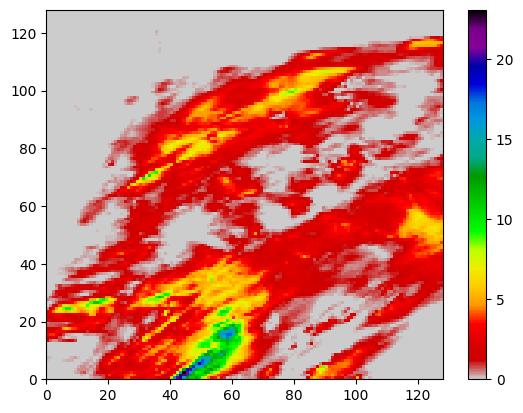

In [14]:
plt.figure()
plt.pcolormesh(temp, cmap=plt.cm.nipy_spectral_r)
plt.colorbar()